In [3]:
import cv2 as cv
from deepface import DeepFace

In [25]:
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'fastmtcnn',
]
lst = dict()
for backend in backends:
  try:
    objs = DeepFace.extract_faces("/home/sawaiz/Documents/Lab/In Progress/Video face detection/experimentation_images/1.png",
            enforce_detection=False,
            detector_backend=backend
    )
    lst[backend] = objs
  except Exception as e:
    pass

shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded
4/4 [==============================] - 0s 89ms/step


In [27]:
for key in lst:
    print(key, len(lst[key]) )

opencv 9
ssd 1
mtcnn 13
retinaface 15
mediapipe 1


In [30]:
def draw(image, bounding_boxes, text):
    for bbox in bounding_boxes:
        x = bbox['facial_area']['x']
        y = bbox['facial_area']['y']
        w = bbox['facial_area']['w']
        h = bbox['facial_area']['h']

        # Draw a rectangle on the image
        img = cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # (0, 255, 0) is the color in BGR format
        img = cv.putText(img, text, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return img 

In [51]:
path = "/home/sawaiz/Documents/Lab/In Progress/Video face detection/experimentation_images/1.png"
path_1 = "/home/sawaiz/Documents/Lab/In Progress/Video face detection/experimentation_images/output.png"
image = cv.imread(path)
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

for i in range(len(lst["mtcnn"])):
    area = lst["mtcnn"][i]["facial_area"]
    image = draw(image,  [lst["mtcnn"][i]], "none")

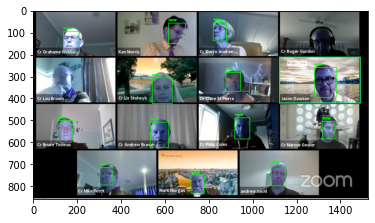

In [52]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [48]:
cv.imwrite(path_1, image)

True